In [481]:
#1. Import the Libraries
import pandas as pd
import numpy as np
from collections import Counter as c
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle



In [482]:
df = pd.read_csv('chronickidneydisease.csv')

In [483]:
df.head()


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [484]:
df.tail()


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


In [485]:
df.shape

(400, 26)

In [486]:
cols=list(df.columns)
print(cols)

['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']


In [487]:
df=df.drop("id",axis=1)

In [488]:
cols=list(df.columns)
print(cols)

['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']


In [489]:
for i in cols:
    print(i,list(df[i].unique()),end="\n\n\n")

age [48.0, 7.0, 62.0, 51.0, 60.0, 68.0, 24.0, 52.0, 53.0, 50.0, 63.0, 40.0, 47.0, 61.0, 21.0, 42.0, 75.0, 69.0, nan, 73.0, 70.0, 65.0, 76.0, 72.0, 82.0, 46.0, 45.0, 35.0, 54.0, 11.0, 59.0, 67.0, 15.0, 55.0, 44.0, 26.0, 64.0, 56.0, 5.0, 74.0, 38.0, 58.0, 71.0, 34.0, 17.0, 12.0, 43.0, 41.0, 57.0, 8.0, 39.0, 66.0, 81.0, 14.0, 27.0, 83.0, 30.0, 4.0, 3.0, 6.0, 32.0, 80.0, 49.0, 90.0, 78.0, 19.0, 2.0, 33.0, 36.0, 37.0, 23.0, 25.0, 20.0, 29.0, 28.0, 22.0, 79.0]


bp [80.0, 50.0, 70.0, 90.0, nan, 100.0, 60.0, 110.0, 140.0, 180.0, 120.0]


sg [1.02, 1.01, 1.005, 1.015, nan, 1.025]


al [1.0, 4.0, 2.0, 3.0, 0.0, nan, 5.0]


su [0.0, 3.0, 4.0, 1.0, nan, 2.0, 5.0]


rbc [nan, 'normal', 'abnormal']


pc ['normal', 'abnormal', nan]


pcc ['notpresent', 'present', nan]


ba ['notpresent', 'present', nan]


bgr [121.0, nan, 423.0, 117.0, 106.0, 74.0, 100.0, 410.0, 138.0, 70.0, 490.0, 380.0, 208.0, 98.0, 157.0, 76.0, 99.0, 114.0, 263.0, 173.0, 95.0, 108.0, 156.0, 264.0, 123.0, 93.0, 107.0, 159.0, 140.0

In [490]:
df.isna().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [491]:
df['classification']=df['classification'].replace("ckd\t","ckd")
df['classification'].unique()

array(['ckd', 'notckd'], dtype=object)

In [492]:
df['rbc']=df['rbc'].replace("abnormal",0)
df['rbc']=df['rbc'].replace("normal",1)

C:\Users\ratis\AppData\Local\Temp\ipykernel_14180\731574431.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['rbc']=df['rbc'].replace("normal",1)


In [493]:
df['rbc'].unique()

array([nan,  1.,  0.])

In [494]:
df['pc']=df['pc'].replace("abnormal",0)
df['pc']=df['pc'].replace("normal",1)
df['pc'].unique()

C:\Users\ratis\AppData\Local\Temp\ipykernel_14180\2188658422.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pc']=df['pc'].replace("normal",1)


array([ 1.,  0., nan])

In [495]:
df['pcc']=df['pcc'].replace("present",1)
df['pcc']=df['pcc'].replace("notpresent",0)
df['pcc'].unique()

C:\Users\ratis\AppData\Local\Temp\ipykernel_14180\1910220090.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pcc']=df['pcc'].replace("notpresent",0)


array([ 0.,  1., nan])

In [496]:
df['ba']=df['ba'].replace("present",1)
df['ba']=df['ba'].replace("notpresent",0)
df['ba'].unique()

C:\Users\ratis\AppData\Local\Temp\ipykernel_14180\3012080676.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['ba']=df['ba'].replace("notpresent",0)


array([ 0.,  1., nan])

In [497]:
df['htn']=df['htn'].replace("yes",1)
df['htn']=df['htn'].replace("no",0)
df['htn'].unique()

C:\Users\ratis\AppData\Local\Temp\ipykernel_14180\4131193193.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['htn']=df['htn'].replace("no",0)


array([ 1.,  0., nan])

In [498]:
df['pe']=df['pe'].replace("yes",1)
df['pe']=df['pe'].replace("no",0)
df['pe'].unique()

C:\Users\ratis\AppData\Local\Temp\ipykernel_14180\2304255651.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pe']=df['pe'].replace("no",0)


array([ 0.,  1., nan])

In [499]:
df['ane']=df['ane'].replace("yes",1)
df['ane']=df['ane'].replace("no",0)
df['ane'].unique()

C:\Users\ratis\AppData\Local\Temp\ipykernel_14180\1793521767.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['ane']=df['ane'].replace("no",0)


array([ 0.,  1., nan])

In [500]:
df['dm']=df['dm'].replace("yes",1)
df['dm']=df['dm'].replace(" yes",1)
df['dm']=df['dm'].replace("\tyes",1)
df['dm']=df['dm'].replace("no",0)
df['dm']=df['dm'].replace("\tno",0)
df['dm'].unique()

C:\Users\ratis\AppData\Local\Temp\ipykernel_14180\2991316306.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['dm']=df['dm'].replace("\tno",0)


array([ 1.,  0., nan])

In [501]:
df["cad"]=df['cad'].replace("yes",1)
df['cad']=df['cad'].replace("no",0)
df['cad']=df['cad'].replace("\tno",0)
df['cad'].unique()

C:\Users\ratis\AppData\Local\Temp\ipykernel_14180\2002029120.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['cad']=df['cad'].replace("\tno",0)


array([ 0.,  1., nan])

In [502]:
df['appet']=df['appet'].replace("good",1)
df['appet']=df['appet'].replace("poor",0)
df['appet'].unique()

C:\Users\ratis\AppData\Local\Temp\ipykernel_14180\3505542670.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['appet']=df['appet'].replace("poor",0)


array([ 1.,  0., nan])

In [503]:
df['pcv']=df['pcv'].replace("\t?",0.0)
df['pcv']=df['pcv'].replace("\t43",43.0)
df['pcv'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', 0.0, '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', 43.0, '47', '9', '49', '50', '53', '51',
       '54'], dtype=object)

In [504]:
lstpcv=list(df['pcv'])
len(lstpcv)

400

In [505]:
def conv_float(lst):
  float_list = []
  
  # Iterate through the original list
  for element in lst:
   
      if isinstance(element, float):
        pass  # Already a float
      elif isinstance(element, int):
        float_element = float(element)
        float_list.append(float_element)
      elif isinstance(element, str):
        float_element = float(element.strip())
        float_list.append(float_element)
      else:
        float_list.append(float_element)
  return float_list  
          
   
      # Handle non-convertible elements (optional)
      # You can print a message, skip the element, or assign a default value
        # Example: pass (skip the element)
      # Example: print(f"Error converting '{element}' to float")


In [506]:
lstpcv=conv_float(lstpcv)
print(lstpcv)
print(len(lstpcv))
df['pcv']=pd.DataFrame(lstpcv)
df['pcv'].unique()

[44.0, 38.0, 31.0, 32.0, 35.0, 39.0, 36.0, 44.0, 33.0, 29.0, 28.0, 32.0, 28.0, 16.0, 24.0, 37.0, 30.0, 24.0, 32.0, 32.0, 39.0, 29.0, 35.0, 37.0, 38.0, 30.0, 34.0, 29.0, 36.0, 32.0, 28.0, 40.0, 32.0, 33.0, 24.0, 28.0, 37.0, 45.0, 29.0, 29.0, 28.0, 33.0, 34.0, 40.0, 40.0, 28.0, 30.0, 33.0, 33.0, 27.0, 48.0, 37.0, 52.0, 44.0, 28.0, 14.0, 29.0, 36.0, 34.0, 30.0, 40.0, 31.0, 29.0, 22.0, 32.0, 40.0, 52.0, 33.0, 30.0, 36.0, 36.0, 32.0, 18.0, 32.0, 33.0, 52.0, 36.0, 42.0, 17.0, 34.0, 37.0, 34.0, 32.0, 33.0, 44.0, 37.0, 46.0, 42.0, 28.0, 37.0, 35.0, 23.0, 22.0, 36.0, 24.0, 37.0, 33.0, 39.0, 29.0, 33.0, 19.0, 33.0, 24.0, 25.0, 32.0, 41.0, 30.0, 32.0, 22.0, 26.0, 36.0, 39.0, 31.0, 35.0, 35.0, 42.0, 37.0, 27.0, 40.0, 42.0, 39.0, 27.0, 33.0, 26.0, 34.0, 41.0, 35.0, 23.0, 41.0, 34.0, 39.0, 28.0, 30.0, 35.0, 31.0, 34.0, 34.0, 38.0, 29.0, 30.0, 26.0, 15.0, 24.0, 30.0, 25.0, 37.0, 21.0, 24.0, 31.0, 43.0, 41.0, 41.0, 41.0, 20.0, 31.0, 34.0, 38.0, 36.0, 34.0, 28.0, 36.0, 38.0, 35.0, 26.0, 36.0, 31.0, 35.

array([44., 38., 31., 32., 35., 39., 36., 33., 29., 28., 16., 24., 37.,
       30., 34., 40., 45., 27., 48., 52., 14., 22., 18., 42., 17., 46.,
       23., 19., 25., 41., 26., 15., 21., 43., 20., 47.,  9., 49., 50.,
       53., 51., 54., nan])

In [507]:
df['wc']=df['wc'].replace("\t?",0.0)
lstwc=list(df['wc'])
print(len(lstwc))
df['wc'].unique()

400


array(['7800', '6000', '7500', '6700', '7300', nan, '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9800', '9100', '7900', '6400',
       '8600', '18900', '21600', '4300', '8500', '11300', '7200', '7700',
       '14600', '6300', '\t6200', '7100', '11800', '9400', '5500', '5800',
       '13200', '12500', '5600', '7000', '11900', '10400', '10700',
       '12700', '6800', '6500', '13600', '10200', '9000', '14900', '8200',
       '15200', '5000', '16300', '12400', '\t8400', '10500', '4200',
       '4700', '10900', '8100', '9500', '2200', '12800', '11200', '19100',
       0.0, '12300', '16700', '2600', '26400', '8800', '7400', '4900',
       '8000', '12000', '15700', '4100', '5700', '11500', '5400', '10800',
       '9900', '5200', '5900', '9300', '9700', '5100', '6600'],
      dtype=object)

In [508]:
len(lstwc)

400

In [509]:
lstwc=conv_float(lstwc)
print(len(lstwc))
df['wc']=pd.DataFrame(lstwc)
df['wc'].unique()

294


array([ 7800.,  6000.,  7500.,  6700.,  7300.,  6900.,  9600., 12100.,
        4500., 12200., 11000.,  3800., 11400.,  5300.,  9200.,  6200.,
        8300.,  8400., 10300.,  9800.,  9100.,  7900.,  6400.,  8600.,
       18900., 21600.,  4300.,  8500., 11300.,  7200.,  7700., 14600.,
        6300.,  7100., 11800.,  9400.,  5500.,  5800., 13200., 12500.,
        5600.,  7000., 11900., 10400., 10700., 12700.,  6800.,  6500.,
       13600., 10200.,  9000., 14900.,  8200., 15200.,  5000., 16300.,
       12400., 10500.,  4200.,  4700., 10900.,  8100.,  9500.,  2200.,
       12800., 11200., 19100., 12300., 16700.,  2600., 26400.,  8800.,
        7400.,  4900.,  8000., 12000., 15700.,  4100.,  5700., 11500.,
        5400., 10800.,  9900.,  5200.,  5900.,  9300.,  9700.,  5100.,
        6600.,    nan])

In [510]:
df['rc']=df['rc'].replace("\t?",0.0)
lstrc=list(df['rc'])
df['rc'].unique()

array(['5.2', nan, '3.9', '4.6', '4.4', '5', '4.0', '3.7', '3.8', '3.4',
       '2.6', '2.8', '4.3', '3.2', '3.6', '4', '4.1', '4.9', '2.5', '4.2',
       '4.5', '3.1', '4.7', '3.5', '6.0', '5.0', '2.1', '5.6', '2.3',
       '2.9', '2.7', '8.0', '3.3', '3.0', '3', '2.4', '4.8', 0.0, '5.4',
       '6.1', '6.2', '6.3', '5.1', '5.8', '5.5', '5.3', '6.4', '5.7',
       '5.9', '6.5'], dtype=object)

In [511]:
lstrc=conv_float(lstrc)
print(len(lstrc))
df['rc']=pd.DataFrame(lstrc)
df['rc'].unique()

269


array([5.2, 3.9, 4.6, 4.4, 5. , 4. , 3.7, 3.8, 3.4, 2.6, 2.8, 4.3, 3.2,
       3.6, 4.1, 4.9, 2.5, 4.2, 4.5, 3.1, 4.7, 3.5, 6. , 2.1, 5.6, 2.3,
       2.9, 2.7, 8. , 3.3, 3. , 2.4, 4.8, 5.4, 6.1, 6.2, 6.3, 5.1, 5.8,
       5.5, 5.3, 6.4, 5.7, 5.9, 6.5, nan])

In [512]:
for i in cols:
    print(i,list(df[i].unique()),end="\n\n\n")

age [48.0, 7.0, 62.0, 51.0, 60.0, 68.0, 24.0, 52.0, 53.0, 50.0, 63.0, 40.0, 47.0, 61.0, 21.0, 42.0, 75.0, 69.0, nan, 73.0, 70.0, 65.0, 76.0, 72.0, 82.0, 46.0, 45.0, 35.0, 54.0, 11.0, 59.0, 67.0, 15.0, 55.0, 44.0, 26.0, 64.0, 56.0, 5.0, 74.0, 38.0, 58.0, 71.0, 34.0, 17.0, 12.0, 43.0, 41.0, 57.0, 8.0, 39.0, 66.0, 81.0, 14.0, 27.0, 83.0, 30.0, 4.0, 3.0, 6.0, 32.0, 80.0, 49.0, 90.0, 78.0, 19.0, 2.0, 33.0, 36.0, 37.0, 23.0, 25.0, 20.0, 29.0, 28.0, 22.0, 79.0]


bp [80.0, 50.0, 70.0, 90.0, nan, 100.0, 60.0, 110.0, 140.0, 180.0, 120.0]


sg [1.02, 1.01, 1.005, 1.015, nan, 1.025]


al [1.0, 4.0, 2.0, 3.0, 0.0, nan, 5.0]


su [0.0, 3.0, 4.0, 1.0, nan, 2.0, 5.0]


rbc [nan, 1.0, 0.0]


pc [1.0, 0.0, nan]


pcc [0.0, 1.0, nan]


ba [0.0, 1.0, nan]


bgr [121.0, nan, 423.0, 117.0, 106.0, 74.0, 100.0, 410.0, 138.0, 70.0, 490.0, 380.0, 208.0, 98.0, 157.0, 76.0, 99.0, 114.0, 263.0, 173.0, 95.0, 108.0, 156.0, 264.0, 123.0, 93.0, 107.0, 159.0, 140.0, 171.0, 270.0, 92.0, 137.0, 204.0, 79.0, 207.0, 124.0

In [513]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,1.0,0.0,0.0,121.0,...,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,1.0,0.0,0.0,NaN,...,38.0,6000.0,3.9,0.0,0.0,0.0,1.0,0.0,0.0,ckd
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.0,...,31.0,7500.0,4.6,0.0,1.0,0.0,0.0,0.0,1.0,ckd
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.0,...,32.0,6700.0,4.4,1.0,0.0,0.0,0.0,1.0,1.0,ckd
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.0,...,35.0,7300.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,140.0,...,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,notckd
396,42.0,70.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,75.0,...,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,notckd
397,12.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,100.0,...,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,notckd
398,17.0,60.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,114.0,...,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,notckd


In [514]:
df.isna().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                72
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [515]:


# Get data types
data_types = df.dtypes

# Print data types
print(data_types)


age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc               float64
pc                float64
pcc               float64
ba                float64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn               float64
dm                float64
cad               float64
appet             float64
pe                float64
ane               float64
classification     object
dtype: object


In [516]:
df1=df.copy()
df1['classification']=df1['classification'].replace("ckd",1)
df1['classification']=df1['classification'].replace("notckd",0)
df1['classification'].unique()

C:\Users\ratis\AppData\Local\Temp\ipykernel_14180\2354503922.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['classification']=df1['classification'].replace("notckd",0)


array([1, 0], dtype=int64)

Missing Values (NaNs):
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                72
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

Outliers (Boxplots):


<Figure size 2000x600 with 0 Axes>

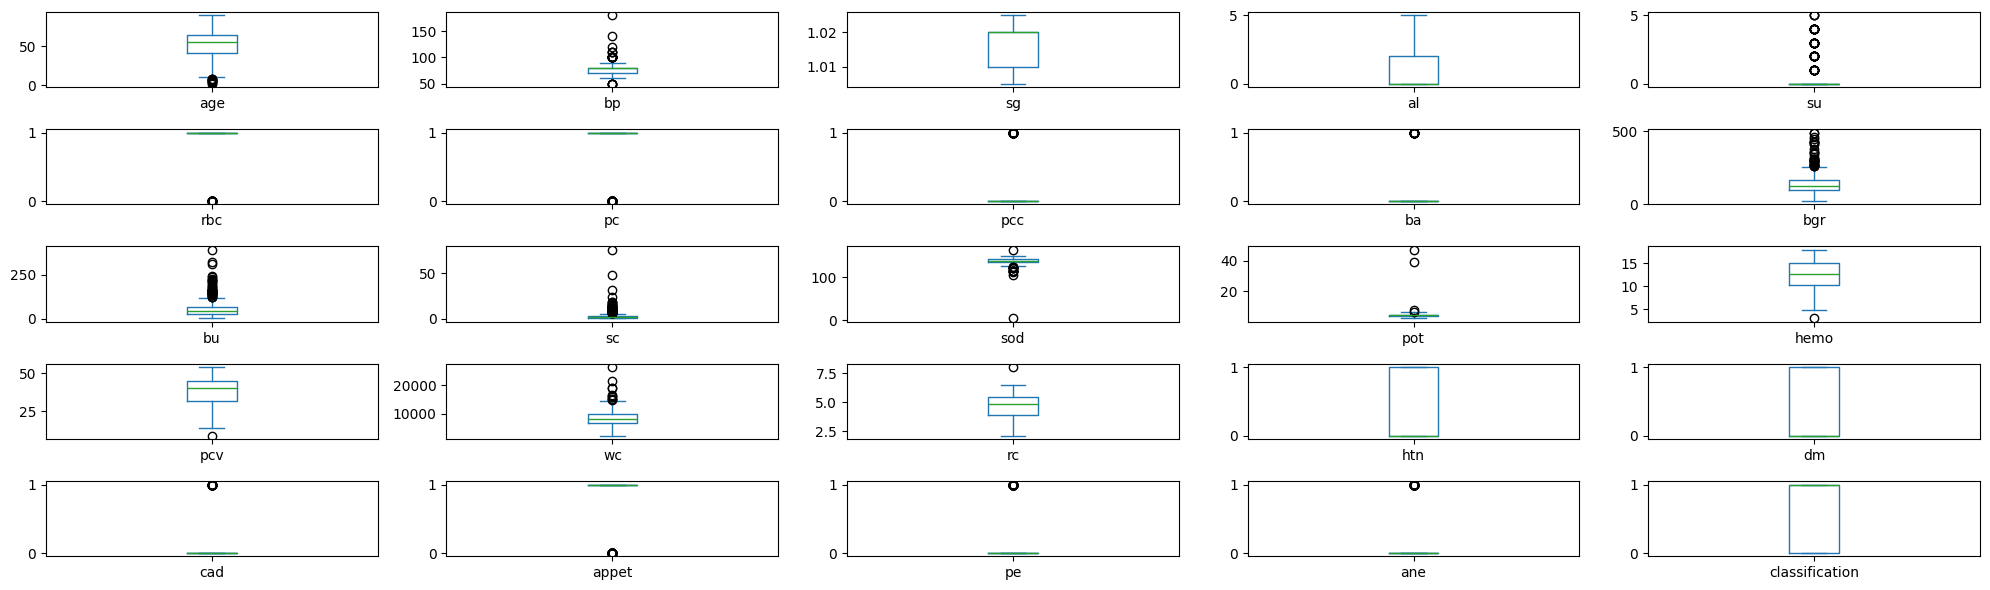


Descriptive Statistics:
              age          bp          sg          al          su         rbc  \
count  391.000000  388.000000  353.000000  354.000000  351.000000  248.000000   
mean    51.483376   76.469072    1.017408    1.016949    0.450142    0.810484   
std     17.169714   13.683637    0.005717    1.352679    1.099191    0.392711   
min      2.000000   50.000000    1.005000    0.000000    0.000000    0.000000   
25%     42.000000   70.000000    1.010000    0.000000    0.000000    1.000000   
50%     55.000000   80.000000    1.020000    0.000000    0.000000    1.000000   
75%     64.500000   80.000000    1.020000    2.000000    0.000000    1.000000   
max     90.000000  180.000000    1.025000    5.000000    5.000000    1.000000   

               pc         pcc          ba         bgr  ...         pcv  \
count  335.000000  396.000000  396.000000  356.000000  ...  328.000000   
mean     0.773134    0.106061    0.055556  148.036517  ...   38.871951   
std      0.419431    0.

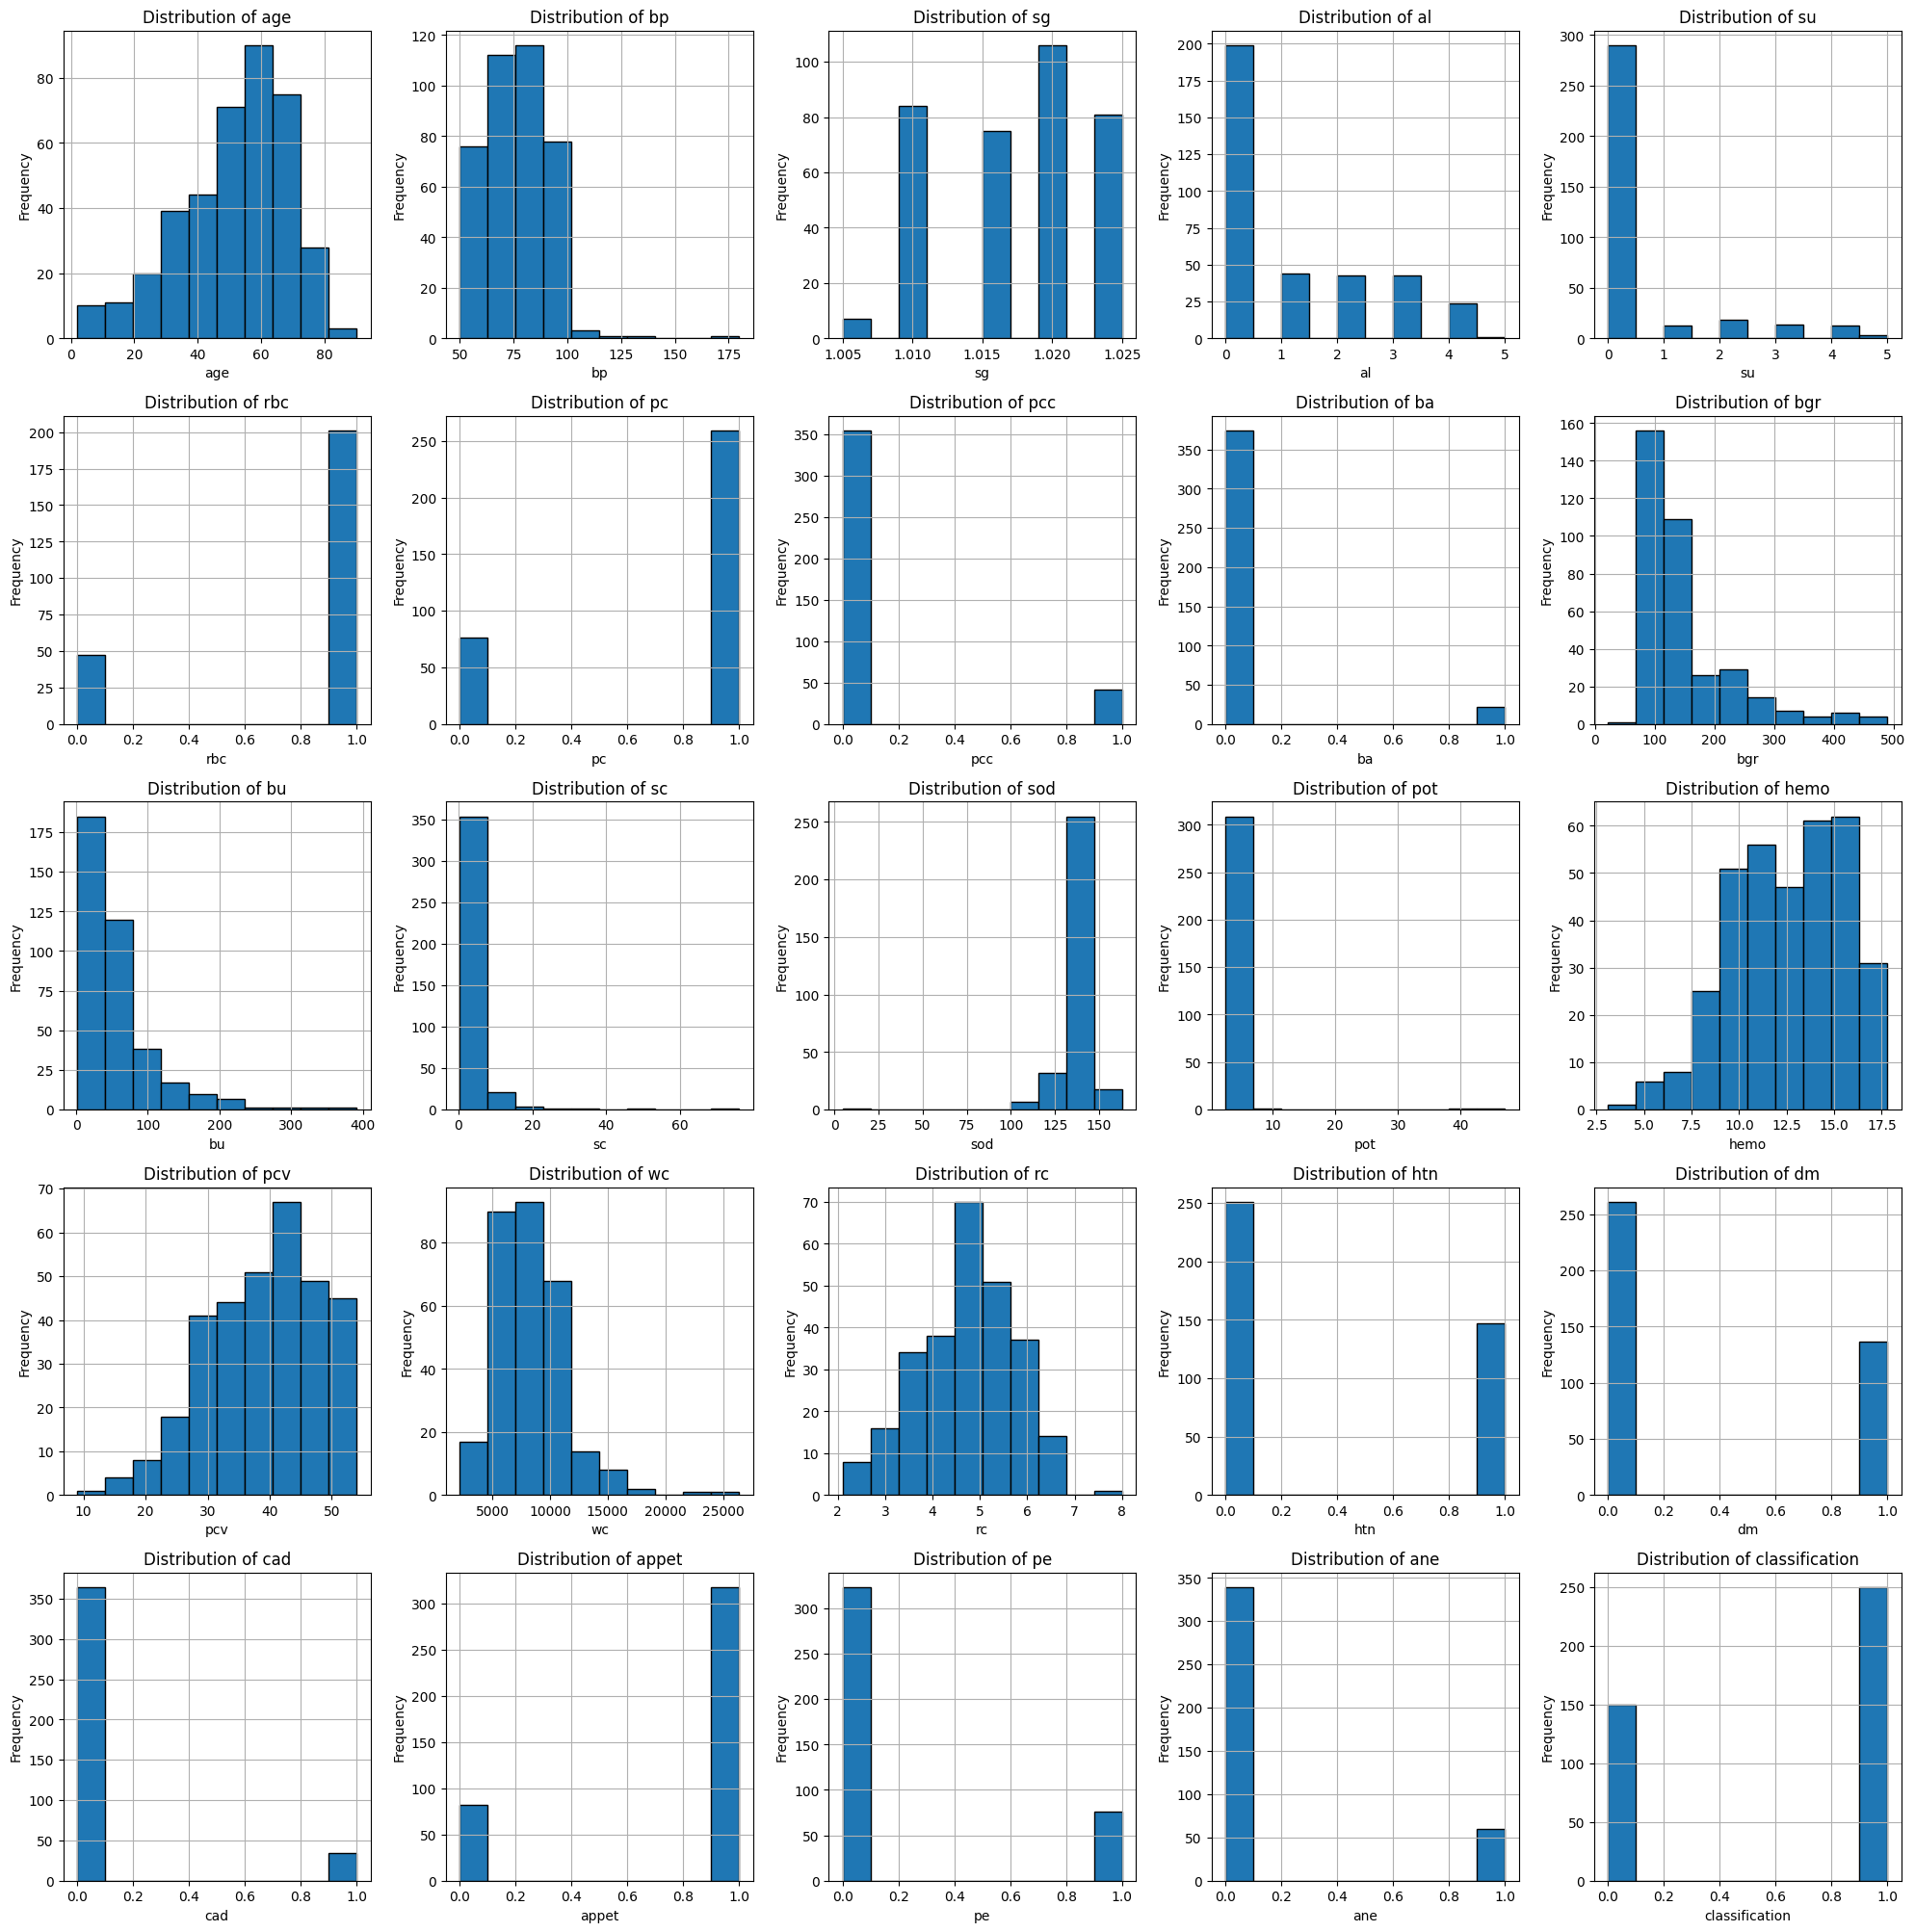


Interdependencies (Heatmap):


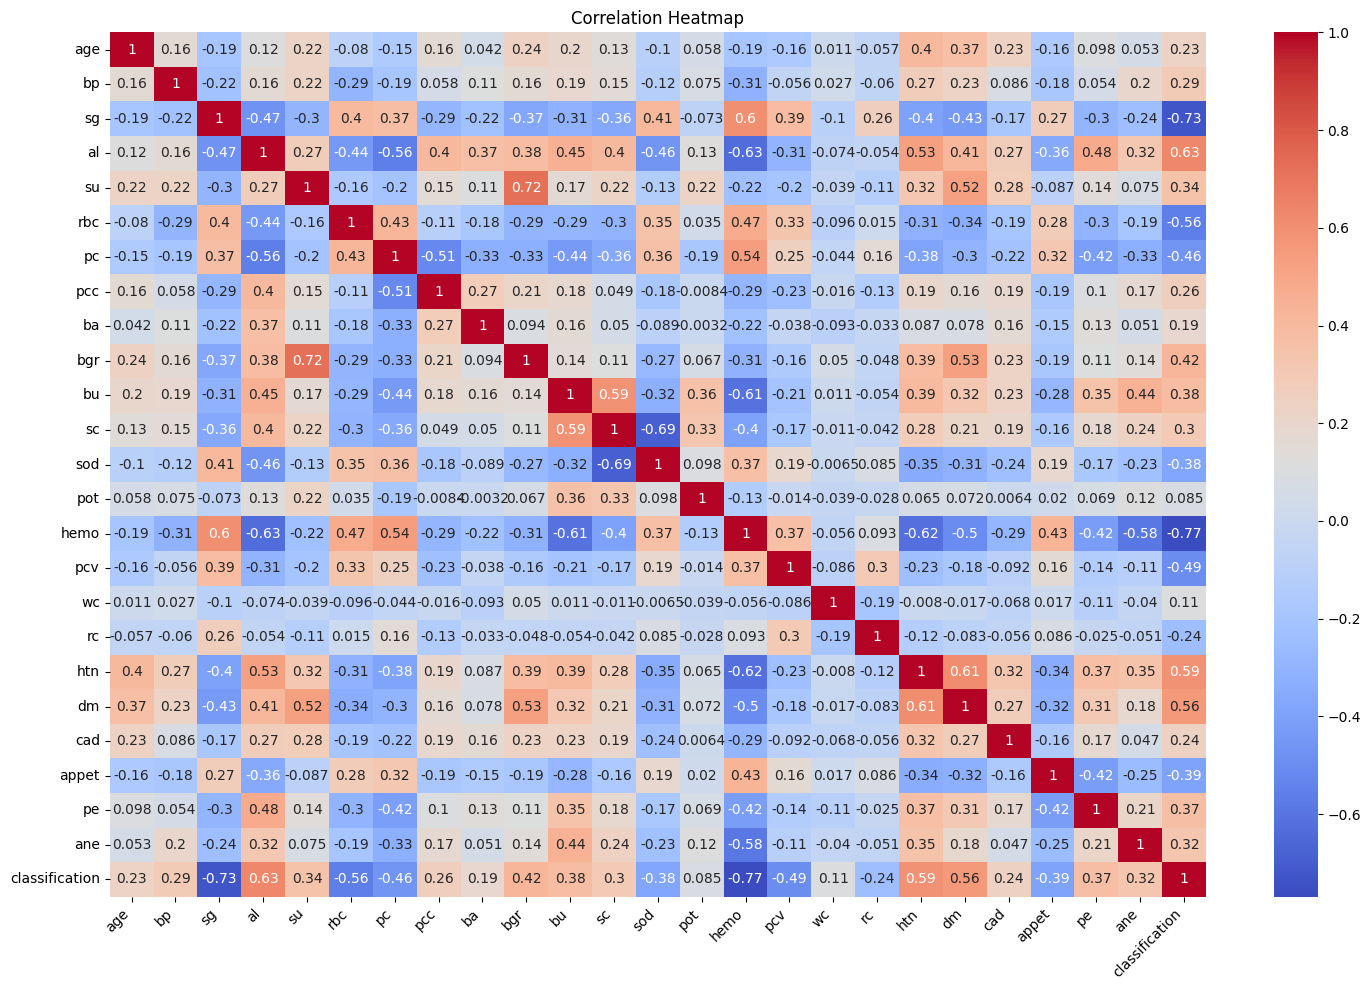


Full DataFrame:
    age    bp     sg   al   su  rbc   pc  pcc   ba    bgr  ...   pcv      wc  \
0  48.0  80.0  1.020  1.0  0.0  NaN  1.0  0.0  0.0  121.0  ...  44.0  7800.0   
1   7.0  50.0  1.020  4.0  0.0  NaN  1.0  0.0  0.0    NaN  ...  38.0  6000.0   
2  62.0  80.0  1.010  2.0  3.0  1.0  1.0  0.0  0.0  423.0  ...  31.0  7500.0   
3  48.0  70.0  1.005  4.0  0.0  1.0  0.0  1.0  0.0  117.0  ...  32.0  6700.0   
4  51.0  80.0  1.010  2.0  0.0  1.0  1.0  0.0  0.0  106.0  ...  35.0  7300.0   

    rc  htn   dm  cad  appet   pe  ane  classification  
0  5.2  1.0  1.0  0.0    1.0  0.0  0.0               1  
1  3.9  0.0  0.0  0.0    1.0  0.0  0.0               1  
2  4.6  0.0  1.0  0.0    0.0  0.0  1.0               1  
3  4.4  1.0  0.0  0.0    0.0  1.0  1.0               1  
4  5.0  0.0  0.0  0.0    1.0  0.0  0.0               1  

[5 rows x 25 columns]


In [517]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_and_visualize_dataframe(df):
  """
  Analyzes and visualizes a pandas DataFrame.

  Args:
      df (pd.DataFrame): The DataFrame to analyze and visualize.

  Returns:
      None
  """

  # Check for missing values (NaNs)
  print("Missing Values (NaNs):")
  print(df.isnull().sum())  # Print the count of missing values per column

  # Identify outliers (optional)
  # There's no one-size-fits-all approach for outlier detection.
  # Consider techniques like boxplots, IQR (Interquartile Range), or z-scores
  # based on your data and analysis goals. Here's an example using boxplots:
  print("\nOutliers (Boxplots):")
  plt.figure(figsize=(20, 6))  # Adjust figure size for better viewing
  df.plot(kind='box', subplots=True, layout=(5, 5), figsize=(20, 6))  # Plot in subplots
  plt.tight_layout()  # Adjust spacing between subplots
  plt.show()

  # Analyze descriptive statistics
  print("\nDescriptive Statistics:")
  print(df.describe(include='all'))  # Include categorical variables

  # Visualize data distribution (histograms, bar plots)
  print("\nData Distribution:")
  num_cols = len(df.select_dtypes(include=[np.number]))
  rows, cols = (num_cols // 5 + 1, 5) if num_cols > 5 else (1, num_cols)  # Adjust subplots based on column count
  plt.figure(figsize=(20, rows * 4))  # Adjust figure size for better viewing

  for i, col in enumerate(df.select_dtypes(include=[np.number])):
    plt.subplot(rows, cols, i + 1)
    df[col].hist(bins=10, edgecolor='black')  # Adjust bins as needed
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)

  plt.tight_layout()  # Adjust spacing between subplots
  plt.show()

  for col in df.select_dtypes(include=[object]):  # Categorical columns
    plt.figure(figsize=(10, 6))  # Adjust figure size for categorical plots
    df[col].value_counts().plot(kind='bar')  # Bar plot for categorical data
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.grid(True)
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
    plt.tight_layout()
    plt.show()

  # Analyze interdependencies (heatmaps)
  print("\nInterdependencies (Heatmap):")
  correlation_matrix = df.corr()  # Calculate correlation matrix
  plt.figure(figsize=(15, 10))  # Adjust figure size for heatmap
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')  # Customize colormap
  plt.title("Correlation Heatmap")
  plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
  plt.yticks(rotation=0)  # Keep y-axis labels horizontal
  plt.tight_layout()
  plt.show()

  print("\nFull DataFrame:")
  print(df.head())  # Display the first few rows

# Example usage (assuming you have your DataFrame named 'df1')
analyze_and_visualize_dataframe(df1)


Till now we have converted all values to float64 format and converted categorical values. The above plots give us a proper idea of the nature of data. We have lots of NaNs,some outliers too. Now we will manage Nan and outliers.we have also removed dirty values .Also, we are going to remove features that highly are interdependent on each other

In [518]:

for i in cols:
    df1[i] = df1[i].fillna(df[i].mode()[0])
    

In [519]:
df1.isna().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [520]:
import numpy as np

def detect_outliers_zscore(data):
    outliers = []
    thres = 3.5
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code
for i in cols:    
    sample_outliers = detect_outliers_zscore(df1[i])
    print(f"Outliers of {i} from Z-scores method: ", sample_outliers)
    print()

Outliers of age from Z-scores method:  []

Outliers of bp from Z-scores method:  [140.0, 180.0]

Outliers of sg from Z-scores method:  []

Outliers of al from Z-scores method:  []

Outliers of su from Z-scores method:  [5.0, 5.0, 5.0]

Outliers of rbc from Z-scores method:  []

Outliers of pc from Z-scores method:  []

Outliers of pcc from Z-scores method:  []

Outliers of ba from Z-scores method:  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Outliers of bgr from Z-scores method:  [423.0, 410.0, 490.0, 425.0, 415.0, 424.0, 447.0, 490.0, 463.0, 424.0]

Outliers of bu from Z-scores method:  [391.0, 322.0, 235.0, 241.0, 309.0]

Outliers of sc from Z-scores method:  [24.0, 76.0, 32.0, 48.1]

Outliers of sod from Z-scores method:  [104.0, 4.5]

Outliers of pot from Z-scores method:  [39.0, 47.0]

Outliers of hemo from Z-scores method:  []

Outliers of pcv from Z-scores method:  [9.0]

Outliers of wc from Z-scores method:  [1

We will remove the outliers form columns with continous values only.(BGR,BU,WC,SC,BP) and replace them with median

In [521]:
import pandas as pd
import numpy as np

def remove_outliers_with_median(fd, cols_to_check, threshold=3.5):


  for col in cols_to_check:
    if pd.api.types.is_numeric_dtype(fd[col]):  # Check for numeric data type
      # Calculate z-scores efficiently using vectorized operations
      z_scores = np.abs(stats.zscore(fd[col]))

      # Identify outliers based on z-score threshold
      outlier_indices = np.where(z_scores > threshold)[0]

      # Replace outliers with median in one step
      fd.loc[outlier_indices, col] = fd[col].median()

  return fd

cols_to_check = ["bgr", "bu", "wc", "sc", "bp"]  # Your continuous columns
df_without_outliers = remove_outliers_with_median(df1.copy(), cols_to_check)

df_without_outliers.isna().sum()

    

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [523]:
import pandas as pd
import numpy as np

def remove_correlated_features(df, target_variable, correlation_threshold=0.8):
  """
  Removes features with high correlation with each other, prioritizing those less correlated with the target variable.

  Args:
      df (pd.DataFrame): The DataFrame containing the data.
      target_variable (str): The name of the target variable.
      correlation_threshold (float, optional): Threshold for removing highly correlated features. Defaults to 0.8.

  Returns:
      pd.DataFrame: The DataFrame with features with high correlation removed.
  """

  # Calculate correlation matrix excluding the target variable
  correlation_matrix = df.corr().drop(target_variable, axis=0).drop(target_variable, axis=1)

  # Create a dictionary to store feature-target variable correlation
  feature_target_corr = df.corr()[target_variable].drop(target_variable).to_dict()

  # Features to remove
  features_to_remove = set()

  # Iterate through upper triangle of correlation matrix (excluding diagonal)
  for col1, row in correlation_matrix.iterrows():
    for col2 in row.index:
      if col1 != col2 and abs(row[col2]) > correlation_threshold:
        # Check which feature has lower correlation with the target variable
        if feature_target_corr[col1] < feature_target_corr[col2]:
          features_to_remove.add(col1)
        else:
          features_to_remove.add(col2)

  # Remove identified features
  return df.drop(features_to_remove, axis=1)

# Example usage (replace 'df' with your actual DataFrame)
target_var = 'classification'  # Your target variable name
df_filtered = remove_correlated_features(df1.copy(), target_var)
print(df_filtered.shape)
# Further analysis or modeling using df_filtered


(400, 25)


Looks like all fetures are properly dependent on label and less interdependent on each other.Now we will visualise and save this data.

Missing Values (NaNs):
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

Outliers (Boxplots):


<Figure size 2000x600 with 0 Axes>

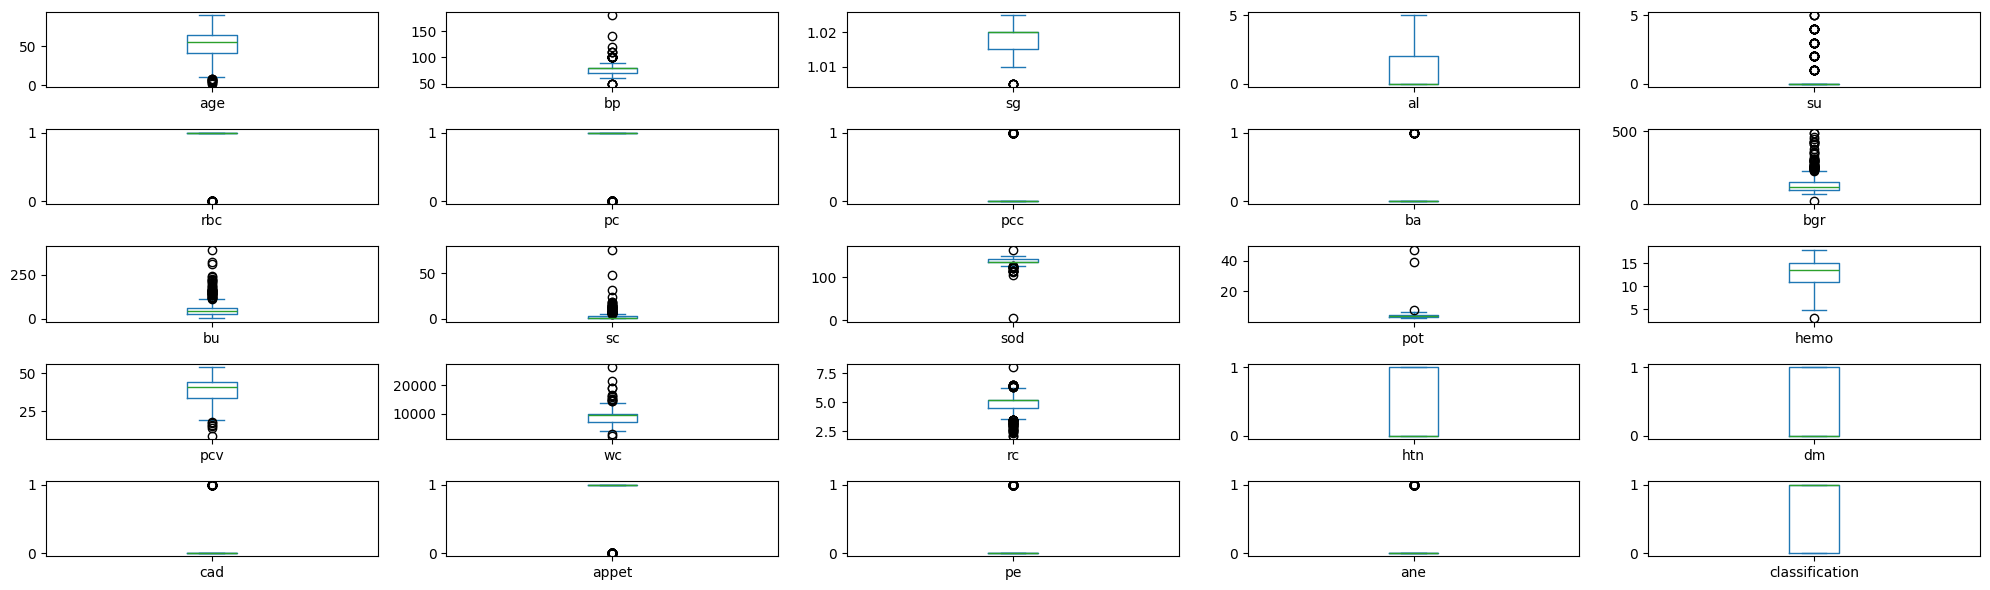


Descriptive Statistics:
              age          bp          sg         al          su         rbc  \
count  400.000000  400.000000  400.000000  400.00000  400.000000  400.000000   
mean    51.675000   76.575000    1.017712    0.90000    0.395000    0.882500   
std     17.022008   13.489785    0.005434    1.31313    1.040038    0.322418   
min      2.000000   50.000000    1.005000    0.00000    0.000000    0.000000   
25%     42.000000   70.000000    1.015000    0.00000    0.000000    1.000000   
50%     55.000000   80.000000    1.020000    0.00000    0.000000    1.000000   
75%     64.000000   80.000000    1.020000    2.00000    0.000000    1.000000   
max     90.000000  180.000000    1.025000    5.00000    5.000000    1.000000   

               pc         pcc          ba         bgr  ...         pcv  \
count  400.000000  400.000000  400.000000  400.000000  ...  400.000000   
mean     0.810000    0.105000    0.055000  142.642500  ...   39.255000   
std      0.392792    0.306937   

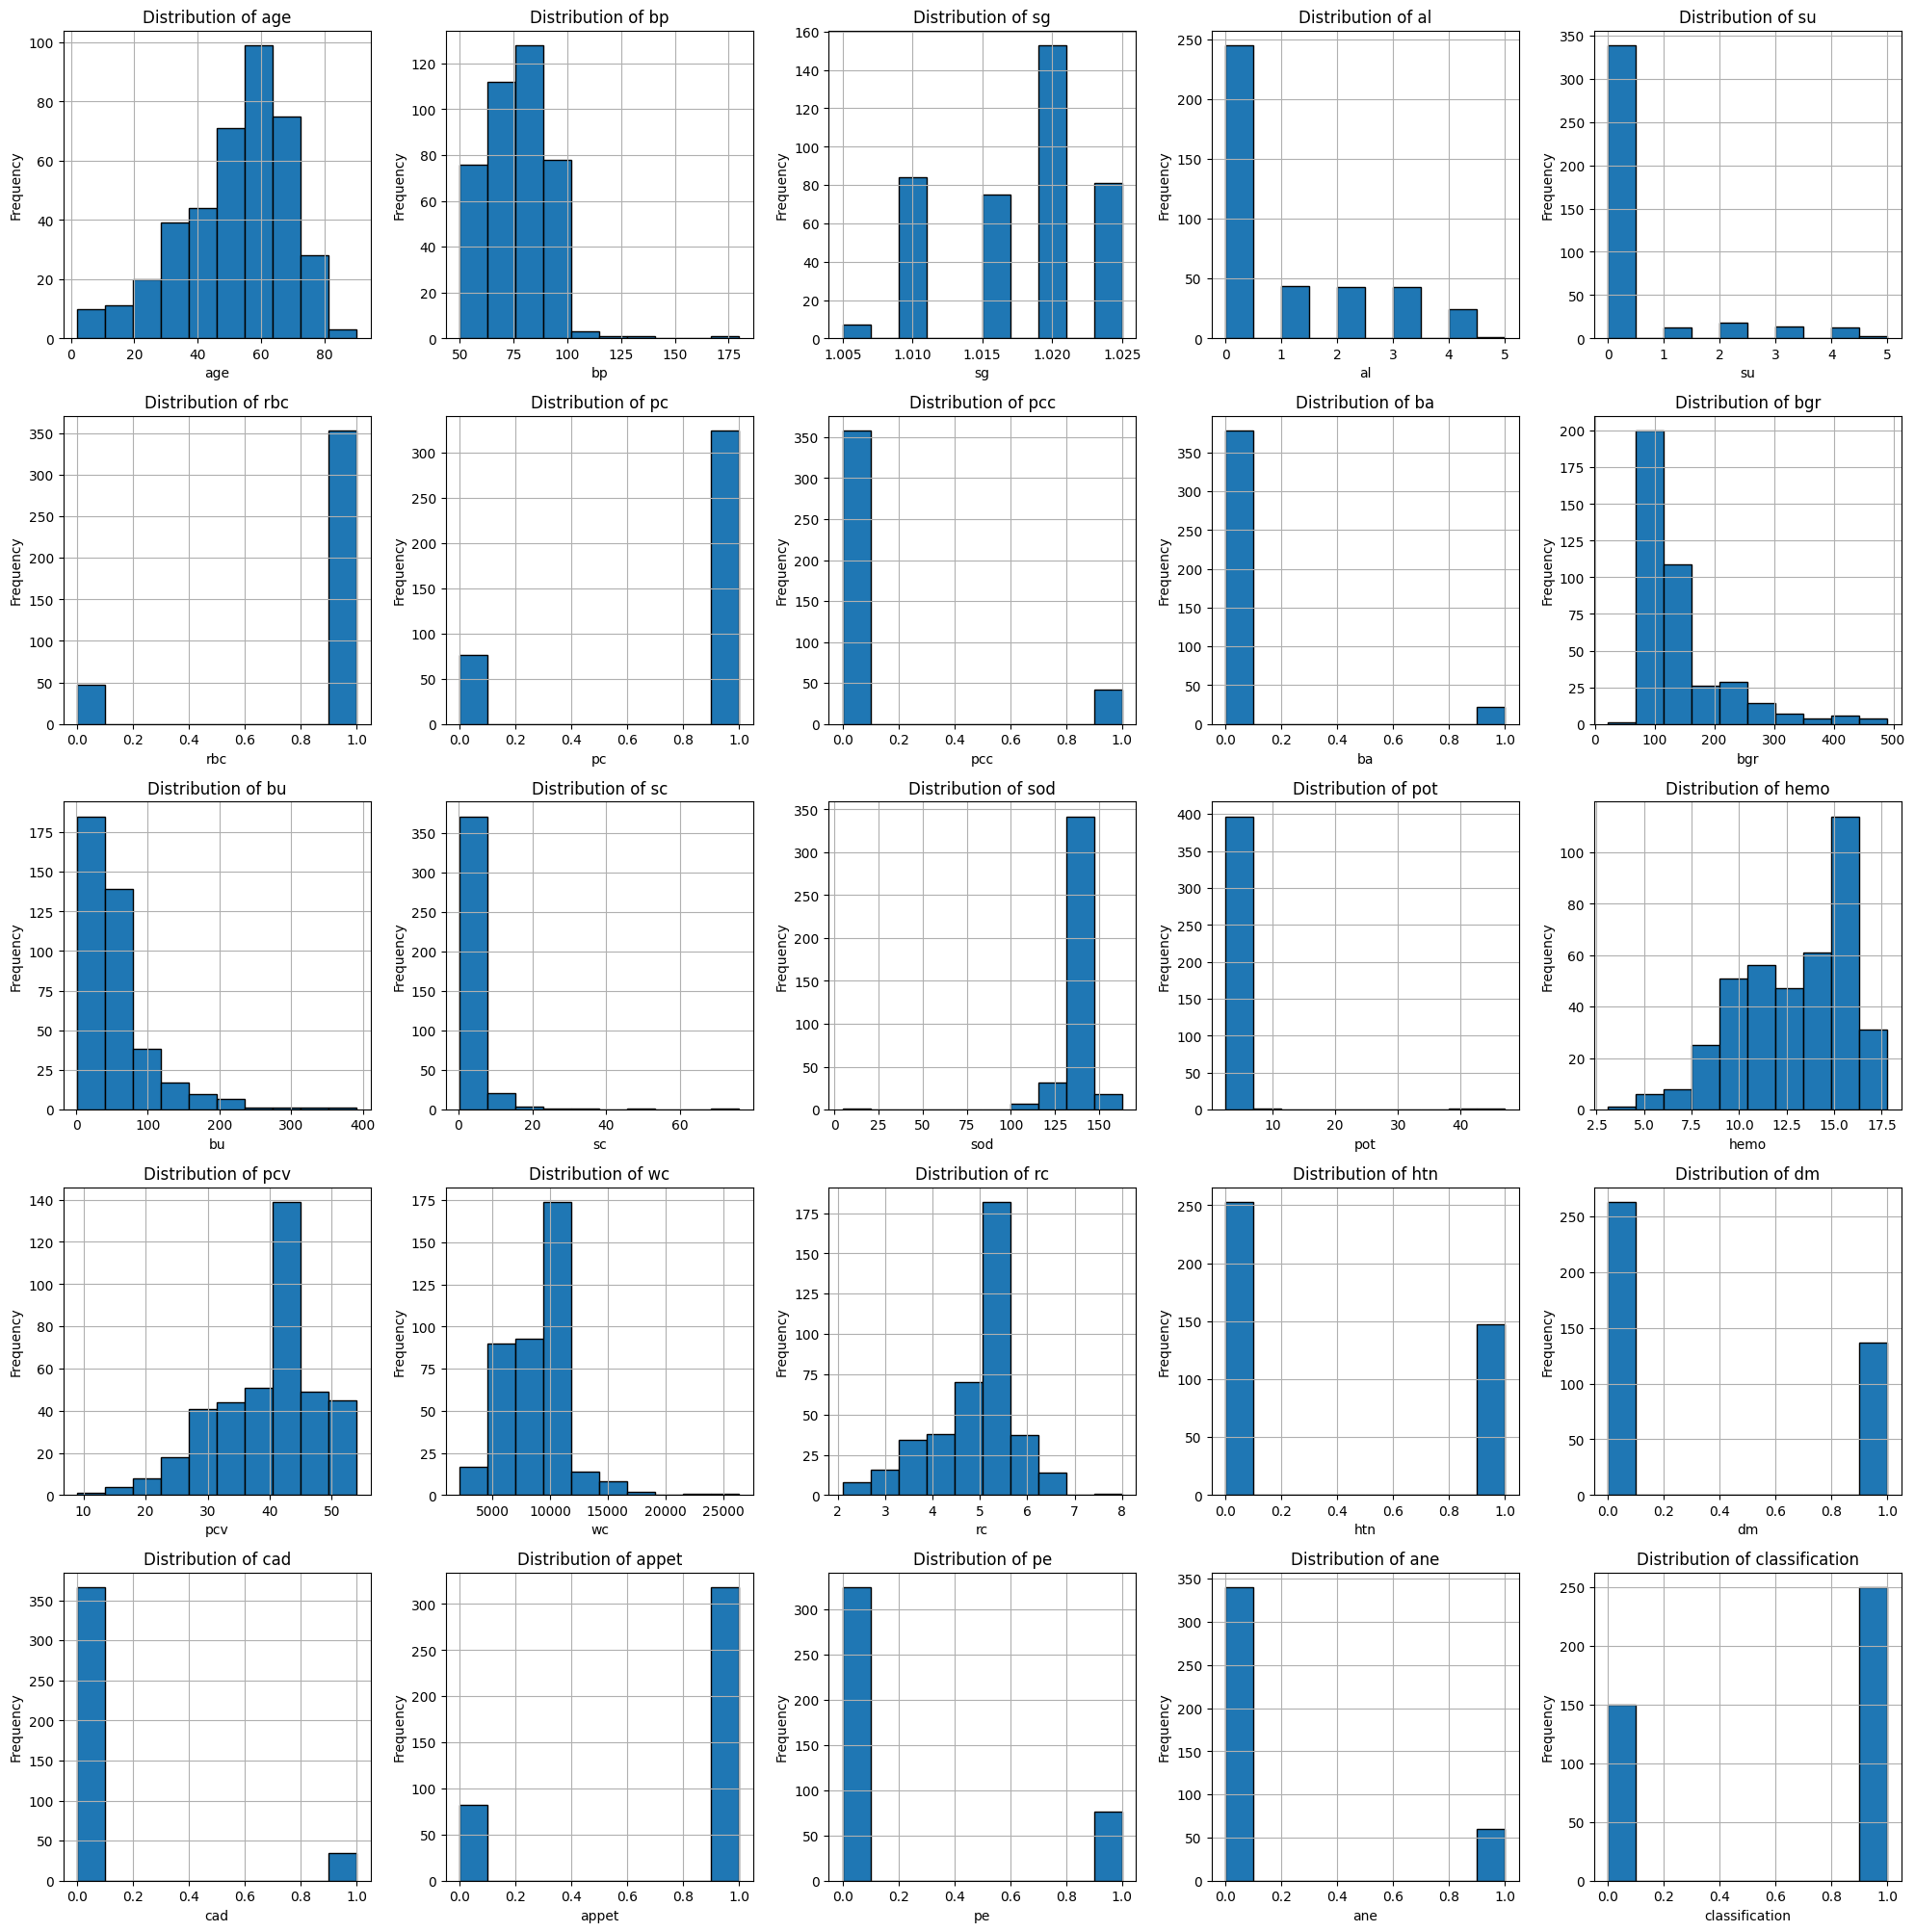


Interdependencies (Heatmap):


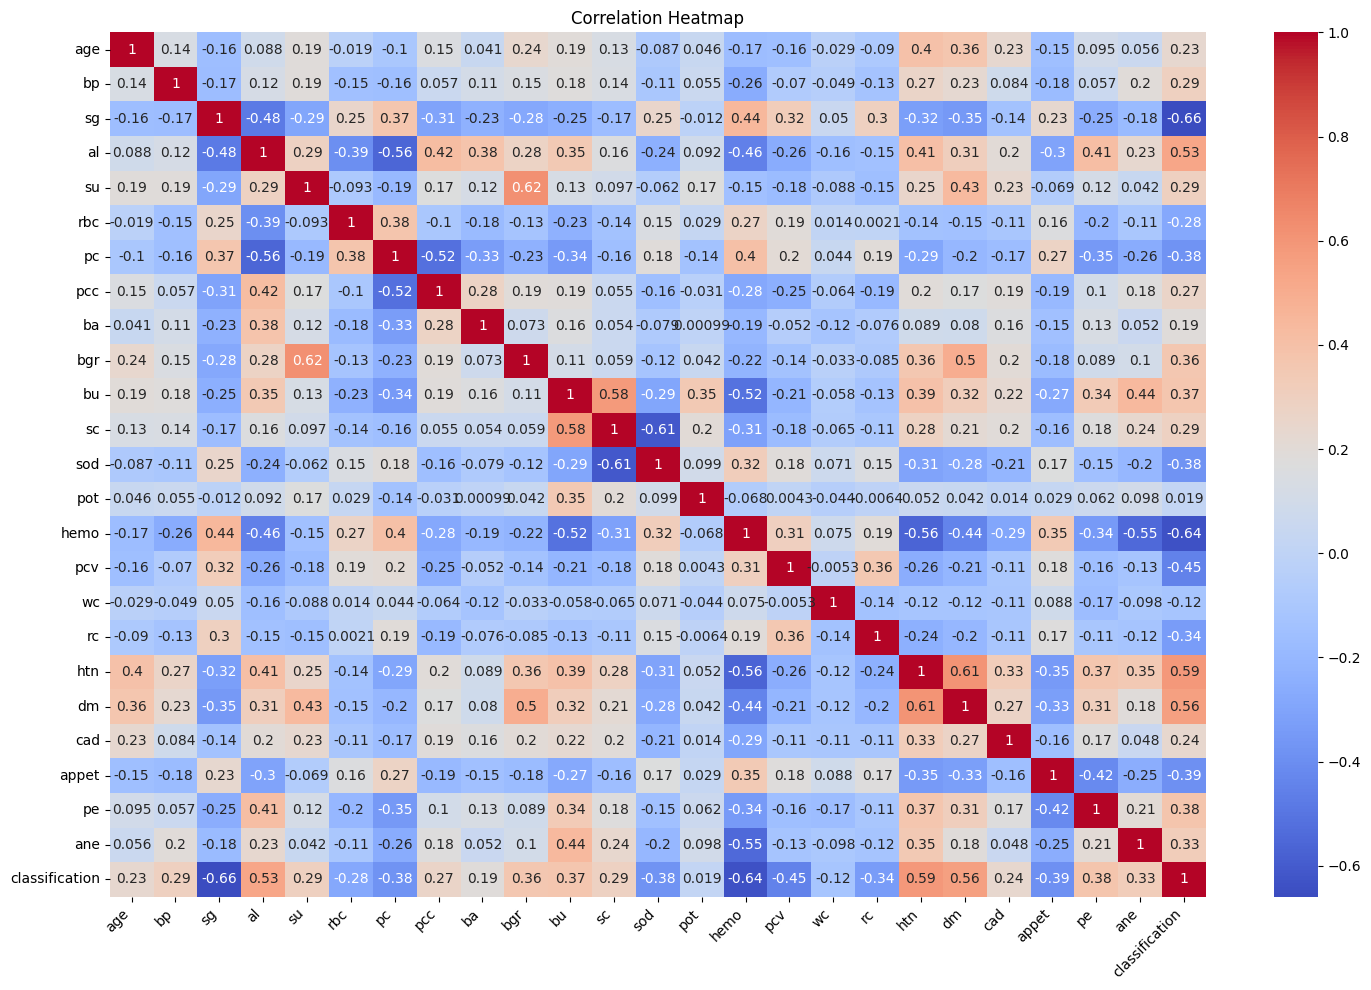


Full DataFrame:
    age    bp     sg   al   su  rbc   pc  pcc   ba    bgr  ...   pcv      wc  \
0  48.0  80.0  1.020  1.0  0.0  1.0  1.0  0.0  0.0  121.0  ...  44.0  7800.0   
1   7.0  50.0  1.020  4.0  0.0  1.0  1.0  0.0  0.0   99.0  ...  38.0  6000.0   
2  62.0  80.0  1.010  2.0  3.0  1.0  1.0  0.0  0.0  423.0  ...  31.0  7500.0   
3  48.0  70.0  1.005  4.0  0.0  1.0  0.0  1.0  0.0  117.0  ...  32.0  6700.0   
4  51.0  80.0  1.010  2.0  0.0  1.0  1.0  0.0  0.0  106.0  ...  35.0  7300.0   

    rc  htn   dm  cad  appet   pe  ane  classification  
0  5.2  1.0  1.0  0.0    1.0  0.0  0.0               1  
1  3.9  0.0  0.0  0.0    1.0  0.0  0.0               1  
2  4.6  0.0  1.0  0.0    0.0  0.0  1.0               1  
3  4.4  1.0  0.0  0.0    0.0  1.0  1.0               1  
4  5.0  0.0  0.0  0.0    1.0  0.0  0.0               1  

[5 rows x 25 columns]


In [524]:
analyze_and_visualize_dataframe(df_filtered)

In [525]:
df_filtered

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1.0,1.0,0.0,0.0,121.0,...,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,1.0,1.0,0.0,0.0,99.0,...,38.0,6000.0,3.9,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.0,...,31.0,7500.0,4.6,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.0,...,32.0,6700.0,4.4,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.0,...,35.0,7300.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,140.0,...,41.0,9800.0,5.2,0.0,0.0,0.0,1.0,0.0,0.0,0
396,42.0,70.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,75.0,...,41.0,9800.0,5.2,0.0,0.0,0.0,1.0,0.0,0.0,0
397,12.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,100.0,...,41.0,9800.0,5.2,0.0,0.0,0.0,1.0,0.0,0.0,0
398,17.0,60.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,114.0,...,41.0,9800.0,5.2,0.0,0.0,0.0,1.0,0.0,0.0,0


In [526]:


# Choose a filename for the CSV (replace 'your_file.csv' with your desired name)
filename = 'Final_Data.csv'

# Export the DataFrame to a CSV file
df_filtered.to_csv(filename, index=False)  # Optional: set index=False to exclude the row index from the CSV

print(f'DataFrame exported to CSV file: {filename}')


DataFrame exported to CSV file: Final_Data.csv
